<a href="https://colab.research.google.com/github/aet59/LandingPage/blob/main/Copy_of_asst1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from PIL import Image
import numpy as np
import math
from scipy import signal
import cv2
from IPython.display import Image as ImageIPy
from IPython.display import display
import time

class Assignment(object):

    """ Returns a box filter of nxn.
    Signals error if n is not odd.
    """
    def boxfilter(self, n):
        assert n>0 and n%2==1, "Dimension must be odd"
        #### START CODE HERE ####
        res = np.array([np.array([0.4 for i in range(n)])])
        return res
        #### END CODE HERE ####

    """ Returns a 1D Gaussian filter of length odd(1.6*sigma).
    Requires sigma>0.
    """
    def gauss1d(self, sigma):
        #### START CODE HERE ####
        assert sigma>0, "Sigma must be positive"
        sigma = float(sigma)
        lengthFilter = math.ceil(sigma * 6)
        if lengthFilter % 2 == 0:
            lengthFilter += 1
        filter1d = np.zeros(lengthFilter)
        maxVal = int(lengthFilter/2)
        x = np.arange(-maxVal, maxVal+1)
        for i in range(lengthFilter):
          filter1d[i] = np.exp(-(x[i]**2)/(2*sigma**2))
          filter1d /= np.sum(filter1d)
          return filter1d

        print(filter1d)
        print(np.sum(filter1d))
        print(lengthFilter)
        print(guass1d(0.3, '\n'))
        print(guass1d(0.5, '\n'))
        print(guass1d(1, '\n'))
        print(guass1d(2, '\n'))
        #### END CODE HERE ####

    def gauss2d(self, sigma):
        # compute the 1D Gaussian filter of SD sigma
        filter1d = self.gauss1d(sigma)

        # convolve two 1D Gaussian filters to get the 2D filter`
        #### START CODE HERE ####
        x = np.arange(-size // 2 + 1, size // 2 + 1)
        filter1d = np.exp(-(x**2)/(2*sigma**2))
        filter1d /= np.sum(filter1d)
        filter2d = np.outer(filter1d, filter1d)
        return filter2d

        sigma_vals = [0.5,1]
        for sigma in sigma_vals:
            filter = gauss2d(sigma)
            print(filter)
        #### END CODE HERE ####


    """ Returns the convolution of the given filter with the given
    image array.
    Requires both inputs being np.float32 arrays, and the filter
    being linear with odd dimensions.
    """
    def convolve2d_manual(self, array, filter):
        #### START CODE HERE ####
        for row in range(array.shape[0]):
            for col in range(array.shape[1]):
              subarray = array[row:row+filter.shape[0], col:col+filter.shape[1]]
        return np.sum(subarray * filter)
        #### END CODE HERE ####

    """ Returns the convolution of the given image with a Gaussian
    filter of the given sigma.
    Requires both inputs being np.float32 arrays.
    """
    def gaussconvolve2d_manual(self, array, sigma):
        gaussFilter = self.gauss2d(sigma)
        #### START CODE HERE ####
        f = guass2d(sigma)
        return signal.convolve2d(array, f, 'same')
        #### END CODE HERE ####

    def gaussconvolve2d_scipy(self, array, sigma):
        gaussFilter = self.gauss2d(sigma)
        return signal.convolve2d(array, gaussFilter, 'same')

    def createGFilteredImg(self, filepath, sigma):
        # load image
        imgOriginal = Image.open(filepath)
        # convert original image to numpy array
        imgOriginal_arrayrep = np.asarray(imgOriginal, dtype=np.float64)
        imgOriginal_array = imgOriginal_arrayrep.copy()
        # initialize output image
        imgGFiltered_array = np.ndarray(imgOriginal_array.shape)
        for i in range(0,3):
            #### START CODE HERE ####
            # hints: 1) extract every color channel
            # 2) apply Gaussian filter of sigma to the channel
            # 3) copy the filtered channel to the output image
            channel = imgOriginal_array[:,:,i]
            channel_filtered = self.gaussconvolve2d_manual(channel, sigma)
            imgGFiltered_array[:,:,i] = self.gaussconvolve2d_manual(channel, sigma)
            imigGFiltered = Image.fromarray(imgGFiltered_array.astype('uint8'))
            imgGFiltered.save('dog_filtered.png','png')
            display(ImageIPy(filename='dog_filtered.png'))
            #### END CODE HERE ####

        return imgGFiltered_array

    def createHighImg(self, filepath, sigma):
        imgOriginal = Image.open(filepath)
        imgOriginal_arrayrep = np.asarray(imgOriginal, dtype=np.float64)
        imgOriginal_array = imgOriginal_arrayrep.copy()

        imgGFiltered_array = self.createGFilteredImg(filepath, sigma)
        #### START CODE HERE ####
        img0aHFreq_array =  imgOriginal_array - imgGFiltered_array
        img0aHFreqVis_array = np.clip((img0aHFreq_array + 128.0), 0.0, 255.0)
        img0aHFreq = Image.fromarray(img0aHFreqVis_array.astype('uint8'))
        img0aHFreq.save('cat_filtered.png','png')
        display(ImageIPy(filename='cat_filtered.png'))
        #### END CODE HERE ####

        return img0aHFreq_array

    def createHybridImg(self, filepath_a, filepath_b, sigma):

        #### START CODE HERE ####
        # hints: 1) get A's low-freq components
        # 2) get B's high-freq components
        # 3) add them
        imgALowFreq = self.createGFilteredImg(filepath_a, sigma)
        imgALowFreq_array = np.asarray(imgALowFreq, dtype=np.float64)
        imgBHighFreq = self.createHighImg(filepath_b, sigma)
        imgBHighFreq_array = np.asarray(imgBHighFreq, dtype=np.float64)
        imgHybrid_array = imgALowFreq + imgBHighFreq
        imgHybrid_array = np.clip(imgHybrid_array, 0.0, 255.0)
        imgHybrid = Image.fromarray(imgHybrid_array.astype('uint8'))
        #### END CODE HERE ####
        # save and show the hybrid image
        return imgHybrid_array


In [ ]:
hw1 = Assignment()

In [ ]:
hw1.boxfilter(3)

array([[0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111],
       [0.11111111, 0.11111111, 0.11111111]])

In [ ]:
hw1.boxfilter(5)

array([[0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04],
       [0.04, 0.04, 0.04, 0.04, 0.04]])

In [ ]:
hw1.boxfilter(4)

AssertionError: Dimension must be odd

In [ ]:
hw1.gauss1d(0.3)

array([0.00383626, 0.99232748, 0.00383626])

In [ ]:
hw1.gauss1d(0.5)

array([0.10650698, 0.78698604, 0.10650698])

In [ ]:
hw1.gauss1d(1)

array([0.00443305, 0.05400558, 0.24203623, 0.39905028, 0.24203623,
       0.05400558, 0.00443305])

In [ ]:
hw1.gauss1d(2)

array([0.0022182 , 0.00877313, 0.02702316, 0.06482519, 0.12110939,
       0.17621312, 0.19967563, 0.17621312, 0.12110939, 0.06482519,
       0.02702316, 0.00877313, 0.0022182 ])

In [ ]:
array4aTest = np.array([[1, 0, 0, 0, 1],[2, 3, 0, 8, 0], [2, 0, 0, 0, 3],[0, 0, 1, 0, 0]])
filter3x3Box = hw1.boxfilter(3)
hw1.convolve2d_manual(array4aTest, filter3x3Box)

array([[0.66666667, 0.66666667, 1.22222222, 1.        , 1.        ],
       [0.88888889, 0.88888889, 1.22222222, 1.33333333, 1.33333333],
       [0.77777778, 0.88888889, 1.33333333, 1.33333333, 1.22222222],
       [0.22222222, 0.33333333, 0.11111111, 0.44444444, 0.33333333]])

In [ ]:
array4aTest = np.array([[1, 0, 0, 0, 1],[2, 3, 0, 8, 0], [2, 0, 0, 0, 3],[0, 0, 1, 0, 0]])
hw1.gaussconvolve2d_manual(array4aTest, 1)

array([[0.58007995, 0.63777484, 0.72999342, 0.95315617, 0.69600453],
       [0.91505868, 1.03640792, 1.21858286, 1.59273618, 1.16723913],
       [0.73060203, 0.78185594, 0.88071206, 1.17922099, 0.98421679],
       [0.30072029, 0.33218745, 0.37469407, 0.45720393, 0.41836252]])

--2024-09-08 07:19:45--  https://panhe.org/course/comp6970fall24/data/dog.bmp
Resolving panhe.org (panhe.org)... 185.199.108.153, 185.199.109.153, 185.199.110.153, ...
Connecting to panhe.org (panhe.org)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 444808 (434K) [image/bmp]
Saving to: ‘dog.bmp’

dog.bmp             100%[===================>] 434.38K  --.-KB/s    in 0.02s   

2024-09-08 07:19:45 (24.2 MB/s) - ‘dog.bmp’ saved [444808/444808]



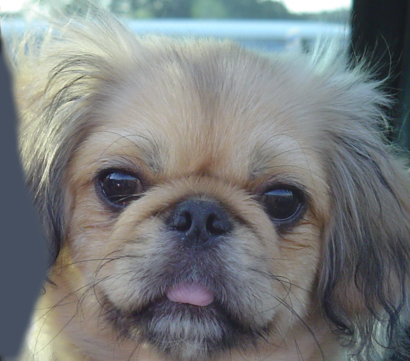

NameError: name 'hw1' is not defined

In [ ]:

!wget -O dog.bmp https://panhe.org/course/comp6970fall24/data/dog.bmp
# load and show the original image
imgDogOriginal = Image.open('dog.bmp')
imgDogOriginal.save('dog.png', 'png')
display(ImageIPy(filename='dog.png'))
# convert original image to greayscale numpy double array
imgDogGrey = imgDogOriginal.convert('L')
imgDogGrey_arrayrep = np.asarray(imgDogGrey, dtype=np.float64)
imgDogGrey_array = imgDogGrey_arrayrep.copy()
# apply Gaussian filter of sigma=3
imgDogGFiltered_array = hw1.gaussconvolve2d_manual(imgDogGrey_array, 3)
# save and show the filtered image
imgDogGFiltered = Image.fromarray(imgDogGFiltered_array.astype('uint8'))
imgDogGFiltered.save('dog_4c.png','png')
display(ImageIPy(filename='dog_4c.png'))

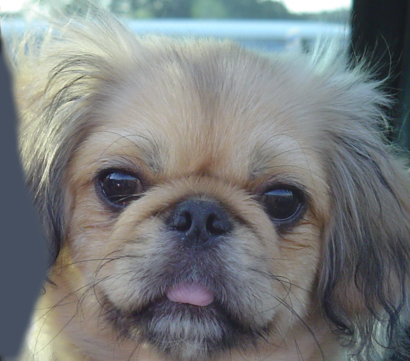

NameError: name 'hw1' is not defined

In [ ]:
# Part 2

sigma = 8.0
# load and show image (original)
display(ImageIPy(filename='dog.png'))

img0bGFiltered_array = hw1.createGFilteredImg('dog.png', sigma)
# save and show the filtered image
img0bGFiltered = Image.fromarray(img0bGFiltered_array.astype('uint8'))
img0bGFiltered.save('dog_filtered.png','png')
display(ImageIPy(filename='dog_filtered.png'))

--2024-09-08 06:33:34--  https://panhe.org/course/comp6970fall24/data/cat.bmp
Resolving panhe.org (panhe.org)... 185.199.109.153, 185.199.111.153, 185.199.108.153, ...
Connecting to panhe.org (panhe.org)|185.199.109.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 444808 (434K) [image/bmp]
Saving to: ‘cat.bmp’

cat.bmp             100%[===================>] 434.38K  --.-KB/s    in 0.05s   

2024-09-08 06:33:34 (8.88 MB/s) - ‘cat.bmp’ saved [444808/444808]



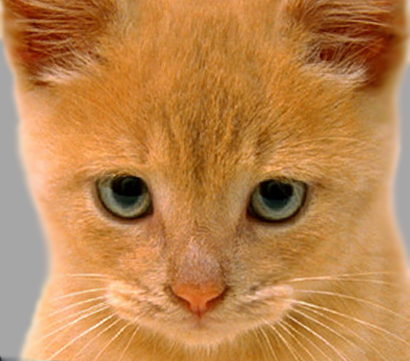

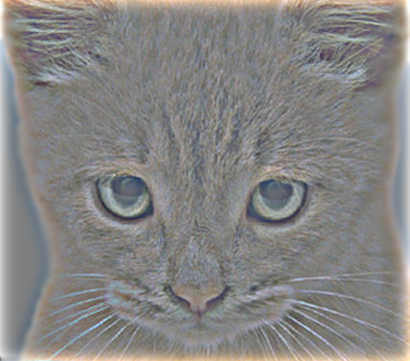

In [ ]:
# Q2
# load and show image (original)
!wget -O cat.bmp https://panhe.org/course/comp6970fall24/data/cat.bmp
img0aOriginal = Image.open('cat.bmp')
img0aOriginal.save('cat.png', 'png')
display(ImageIPy(filename='cat.png'))

img0aHFreq_array = hw1.createHighImg('cat.png', sigma)
# save and show the filtered image
img0aHFreqVis_array = np.clip((img0aHFreq_array + 128.0), 0.0, 255.0)
img0aHFreq = Image.fromarray(img0aHFreqVis_array.astype('uint8'))
img0aHFreq.save('cat_filtered.png','png')
display(ImageIPy(filename='cat_filtered.png'))

In [ ]:
# Q3
""" Creates a hybrid image from image a and b with each's path
specified. The hybrid image is the sum of A's low-freq components
and B's high-freq components.
Uses given sigma for Gaussian filtering.
"""
def createAndVisHybridImg(filepath_a, filepath_b, filepath_hybrid, sigma):
    # get A and B's low-freq components and B's original image as numpy arrays
    imgHybrid_array = hw1.createHybridImg(filepath_a, filepath_b, sigma)
    # save and show the hybrid image
    imgHybrid = Image.fromarray(imgHybrid_array.astype('uint8'))
    imgHybrid.save(filepath_hybrid, 'png')
    print(f"Showing image: {filepath_hybrid}")
    display(ImageIPy(filename=filepath_hybrid))
    return imgHybrid

!wget -O motorcycle.bmp https://panhe.org/course/comp6970fall24/data/motorcycle.bmp
!wget -O bicycle.bmp https://panhe.org/course/comp6970fall24/data/bicycle.bmp
!wget -O marilyn.bmp https://panhe.org/course/comp6970fall24/data/marilyn.bmp
!wget -O einstein.bmp https://panhe.org/course/comp6970fall24/data/einstein.bmp
!wget -O submarine.bmp https://panhe.org/course/comp6970fall24/data/submarine.bmp
!wget -O fish.bmp https://panhe.org/course/comp6970fall24/data/fish.bmp
!wget -O plane.bmp https://panhe.org/course/comp6970fall24/data/plane.bmp
!wget -O bird.bmp https://panhe.org/course/comp6970fall24/data/bird.bmp
# creates hybrids for test pairs
for sig in [4.0, 8.0, 12.0]:
    createAndVisHybridImg('dog.bmp', 'cat.bmp', f'0_hybrid_sigma={sig}.png', sig)
    createAndVisHybridImg('motorcycle.bmp', 'bicycle.bmp', f'1_hybrid_sigma={sig}.png', sig)
    createAndVisHybridImg('marilyn.bmp', 'einstein.bmp', f'2_hybrid_sigma={sig}.png', sig)
    createAndVisHybridImg('submarine.bmp', 'fish.bmp', f'3_hybrid_sigma={sig}.png', sig)
    createAndVisHybridImg('plane.bmp', 'bird.bmp', f'4_hybrid_sigma={sig}.png', sig)

--2024-09-08 07:44:42--  https://panhe.org/course/comp6970fall24/data/motorcycle.bmp
Resolving panhe.org (panhe.org)... 185.199.108.153, 185.199.110.153, 185.199.109.153, ...
Connecting to panhe.org (panhe.org)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 408056 (398K) [image/bmp]
Saving to: ‘motorcycle.bmp’

motorcycle.bmp      100%[===================>] 398.49K  --.-KB/s    in 0.06s   

2024-09-08 07:44:42 (6.06 MB/s) - ‘motorcycle.bmp’ saved [408056/408056]

--2024-09-08 07:44:42--  https://panhe.org/course/comp6970fall24/data/bicycle.bmp
Resolving panhe.org (panhe.org)... 185.199.108.153, 185.199.110.153, 185.199.109.153, ...
Connecting to panhe.org (panhe.org)|185.199.108.153|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 408056 (398K) [image/bmp]
Saving to: ‘bicycle.bmp’

bicycle.bmp         100%[===================>] 398.49K  --.-KB/s    in 0.06s   

2024-09-08 07:44:42 (6.49 MB/s) - ‘bicycle.bmp’ saved [408

NameError: name 'createHybridImg' is not defined